In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
!pip install kaggle

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow_hub

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

adorable-cat-lifestyle.jpg	    dogs-vs-cats.zip  resized	   sampleSubmission.csv  train
cute-beagle-dark-brown-bow-tie.jpg  kaggle.json       sample_data  test1.zip		 train.zip


In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [ ]:
 from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [ ]:
import os
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('No of images:',file_count)

No of images: 25000


In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.9209.jpg', 'dog.9684.jpg', 'cat.7868.jpg', 'cat.1854.jpg', 'dog.9272.jpg', 'dog.5452.jpg', 'cat.4698.jpg', 'dog.1237.jpg', 'dog.11049.jpg', 'cat.5672.jpg', 'cat.11243.jpg', 'cat.7016.jpg', 'dog.7129.jpg', 'dog.2920.jpg', 'dog.4233.jpg', 'cat.2031.jpg', 'cat.1794.jpg', 'cat.11094.jpg', 'dog.7120.jpg', 'dog.5054.jpg', 'cat.7466.jpg', 'dog.351.jpg', 'cat.2734.jpg', 'cat.1022.jpg', 'cat.6307.jpg', 'cat.4005.jpg', 'cat.9428.jpg', 'dog.2109.jpg', 'dog.4897.jpg', 'cat.2156.jpg', 'cat.3882.jpg', 'cat.7145.jpg', 'dog.8480.jpg', 'cat.8922.jpg', 'cat.2898.jpg', 'dog.9131.jpg', 'cat.7899.jpg', 'cat.5683.jpg', 'cat.8455.jpg', 'cat.8935.jpg', 'dog.3432.jpg', 'cat.2826.jpg', 'dog.8783.jpg', 'cat.4306.jpg', 'cat.2733.jpg', 'cat.11410.jpg', 'cat.10530.jpg', 'cat.3762.jpg', 'cat.3022.jpg', 'dog.4726.jpg', 'cat.7345.jpg', 'dog.9757.jpg', 'cat.11023.jpg', 'cat.9687.jpg', 'dog.6558.jpg', 'cat.10219.jpg', 'dog.10318.jpg', 'dog.11773.jpg', 'cat.4220.jpg', 'cat.3385.jpg', 'cat.2627.jpg', 'cat.10672.jpg'

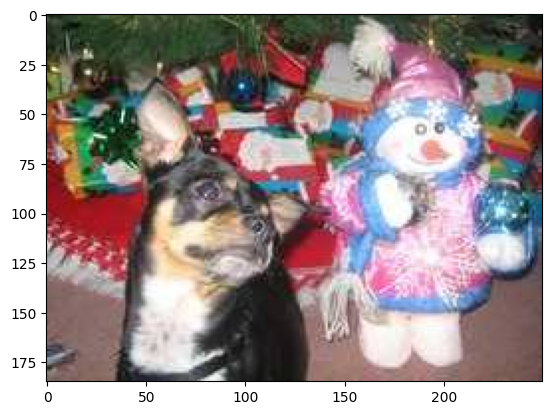

In [ ]:
img = mpimg.imread('/content/train/dog.9209.jpg')
imgplt = plt.imshow(img)
plt.show()

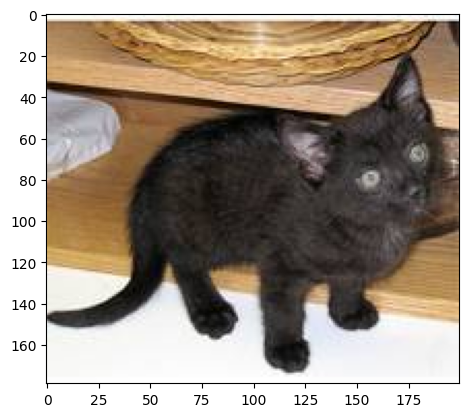

In [ ]:
img = mpimg.imread('/content/train/cat.7868.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
dog_count=0
cat_count=0
for img_file in file_names:
  name=img_file[0:3]
  if(name=='dog'):
    dog_count+=1
  else:
    cat_count+=1

print('dog:', dog_count)
print('cat:', cat_count)

dog: 12500
cat: 12500


Resizing

In [ ]:
os.mkdir('/content/resized')

FileExistsError: [Errno 17] File exists: '/content/resized'

In [ ]:
original = '/content/train/'
resize = '/content/resized/'

for i in range(3000):

  filename = os.listdir(original)[i]
  img_path = original+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resize+filename
  img.save(newImgPath)

Size Check

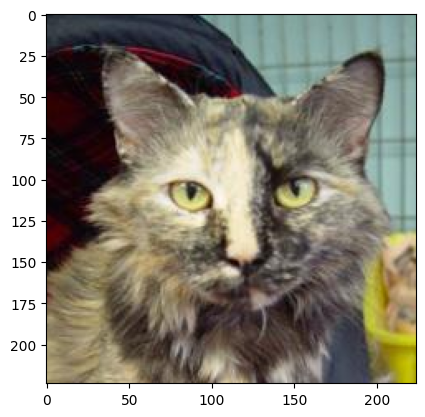

In [ ]:
 img = mpimg.imread('/content/resized/cat.10.jpg')
imgplt = plt.imshow(img)
plt.show()

Cat------->0
Dog------->1


In [ ]:
labels= []
file_names= os.listdir('/content/resized')
for i in range(3000):
  name=file_names[i][0:3]
  if(name=='dog'):
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(file_names[0:5])
print(labels[0:5])

['dog.9209.jpg', 'dog.9684.jpg', 'cat.7868.jpg', 'cat.1854.jpg', 'dog.9272.jpg']
[1, 1, 0, 0, 1]


In [ ]:
import cv2
import glob

image_directory = '/content/resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_img = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_img[0:4])

[[[[ 18  32  20]
   [ 13  27  15]
   [ 20  34  22]
   ...
   [ 17  22  13]
   [ 20  25  16]
   [ 20  25  16]]

  [[ 37  51  39]
   [ 23  37  25]
   [ 20  34  22]
   ...
   [ 17  22  13]
   [ 17  21  15]
   [ 17  22  13]]

  [[ 65  79  67]
   [ 39  53  41]
   [ 29  43  31]
   ...
   [ 16  20  14]
   [ 15  19  14]
   [ 14  18  12]]

  ...

  [[ 99 108 118]
   [101 110 120]
   [107 114 129]
   ...
   [ 75  75 105]
   [ 72  72 102]
   [ 69  69  99]]

  [[105 114 124]
   [ 99 108 118]
   [ 97 104 119]
   ...
   [ 77  77 107]
   [ 74  74 104]
   [ 71  71 101]]

  [[ 95 104 114]
   [ 92 101 111]
   [ 98 105 120]
   ...
   [ 79  79 109]
   [ 77  77 107]
   [ 74  74 104]]]


 [[[129 108 110]
   [129 111 112]
   [107  89  90]
   ...
   [120 140 141]
   [105 121 120]
   [105 122 119]]

  [[143 122 124]
   [132 114 115]
   [ 96  80  81]
   ...
   [120 140 141]
   [105 121 120]
   [112 129 126]]

  [[125 104 107]
   [125 106 109]
   [ 99  82  85]
   ...
   [126 145 148]
   [123 138 140]
   [140 156

In [ ]:
x=dog_cat_img
y=np.asarray(labels)

In [ ]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(len(x_train))
print(len(x_test))

2400
600


In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
print(x_train_scaled)

[[[[0.91764706 0.83529412 0.82745098]
   [0.91372549 0.83137255 0.82352941]
   [0.9254902  0.83921569 0.81960784]
   ...
   [0.84705882 0.76078431 0.6627451 ]
   [0.84313725 0.76078431 0.65490196]
   [0.68627451 0.60392157 0.49803922]]

  [[0.90980392 0.82745098 0.81960784]
   [0.90980392 0.82745098 0.81960784]
   [0.92156863 0.83529412 0.81568627]
   ...
   [0.85098039 0.75686275 0.6627451 ]
   [0.84705882 0.75686275 0.65490196]
   [0.68627451 0.59607843 0.49411765]]

  [[0.91764706 0.82745098 0.81960784]
   [0.91764706 0.82745098 0.81960784]
   [0.92941176 0.83137255 0.81568627]
   ...
   [0.86666667 0.76470588 0.67058824]
   [0.85098039 0.75294118 0.65098039]
   [0.68627451 0.58823529 0.48627451]]

  ...

  [[0.8745098  0.76862745 0.72941176]
   [0.85490196 0.74901961 0.70980392]
   [0.8745098  0.76862745 0.72941176]
   ...
   [0.1254902  0.05882353 0.07058824]
   [0.12941176 0.0627451  0.0745098 ]
   [0.13333333 0.06666667 0.07843137]]

  [[0.84705882 0.74117647 0.70196078]
   [0.8

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as thub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
mobile_net = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
pretrained_model = thub.KerasLayer(mobile_net,input_shape=(224,224,3),trainable=False)

In [ ]:
num_classes =2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [ ]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.5161 - loss: 0.8006
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - acc: 0.6304 - loss: 0.6523
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - acc: 0.7100 - loss: 0.5613
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - acc: 0.7622 - loss: 0.4916
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - acc: 0.7808 - loss: 0.4551
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - acc: 0.8687 - loss: 0.2997
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - acc: 0.9070 - loss: 0.2298
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - acc: 0.9481 - loss: 0.1427
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - acc: 0.9548 - loss: 0.1255
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - acc: 0.9800 - loss: 0.0663


In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.6987 - loss: 1.2515
Test score: 1.2642062902450562
Test accuracy: 0.7016666531562805


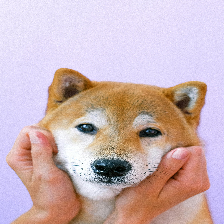

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[0.03260551 0.96739453]]
DOG


In [ ]:
image_path = '/content/pexels-shvetsa-4588012.jpg'

img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found.")
else:

    img_resize = cv2.resize(img, (224, 224))
    cv2_imshow(img_resize)
    img_scaled = img_resize / 255.0

    img_reshape = np.reshape(img_scaled, [1, 224, 224, 3])

    prediction = model.predict(img_reshape)

    print(prediction)

    if prediction[0][0] > prediction[0][1]:
        print("CAT")
    else:
        print("DOG")
